# Mini Project 2: Wine Quality Data Exploration and Visualization

#### Created by Group 7 - Kamilla, Jeanette, Alberte, Juvena, Felicia

## Objective

This assignment aims to develop practical skills in business data exploration and visualisation using fundamental statistical techniques. The project focuses on analysing a wine quality dataset to uncover insights, identify patterns, and present findings using Python.

Before we begin analyzing the wine data, we need to import a few essential Python libraries that will help us work with the data easily.

- **Pandas**: This is a powerful library used to handle and manipulate data in tables (called DataFrames).
- **NumPy**: It helps with numerical operations, especially when we work with arrays or need to do math.
- **Matplotlib** and **Seaborn**: These are popular libraries for creating visual charts and graphs. We'll use them to help us understand the data better by seeing it.
- **SciPy (stats module)**: This gives us access to statistical tools like checking if data is normally distributed.

We also set some default styles for our plots to make them look nicer and easier to read.

In [259]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Set plot styles for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

------------------------------

# Load and Clean the Data

## 1. Load Wine Data

Now that we have the tools ready, we need to load our data into Python so we can work with it.

In this case, we have two datasets:
- One for **red wine**
- One for **white wine**

Both datasets are stored in Excel files. We'll define a simple function that uses `pandas` to read an Excel file and return it as a DataFrame. Then we use this function to load both files into memory.
This way, we can easily repeat the same loading process for both red and white wine datasets without writing duplicate code.

In [34]:
# File paths for the wine quality datasets
dataset_redwine = 'Dataset/winequality-red.xlsx'
dataset_whitewine = 'Dataset/winequality-white.xlsx'

# Function to load the Excel files
def load_xlsx_to_dataframe(file_path):
    # Reads the Excel file and skips the first row if it contains a description or title
    df = pd.read_excel(file_path, header=1)
    return df

# Load datasets
print("..Loading wine quality datasets")
df_redwine = load_xlsx_to_dataframe(dataset_redwine)
df_whitewine = load_xlsx_to_dataframe(dataset_whitewine)


..Loading wine quality datasets


After loading the red wine dataset, we want to take a quick look at it to understand what kind of information it contains.

- We use `.head()` to show the first few rows of the dataset. This gives us a quick preview of the structure and contents.
- We also print the shape of the dataset to find out how many samples (rows) and features (columns) it has.
This is an important first step before doing any data cleaning or analysis.

In [36]:
# Preview the red wine dataset
print("\nRed wine dataset preview:")

# Display the first 5 rows of the red wine dataset to get a quick overview
display(df_redwine.head())

# Print the shape of the dataset: 
print(f"\nRed wine dataset shape: {df_redwine.shape} (rows, columns)")

# Print the number of wine samples (rows)
print(f"Total number of samples: {df_redwine.shape[0]}")

# Print the number of features/variables measured (columns)
print(f"Total number of features: {df_redwine.shape[1]}")


Red wine dataset preview:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Red wine dataset shape: (1599, 12) (rows, columns)
Total number of samples: 1599
Total number of features: 12


We do the same with the white wine dataset as we did above.
This helps us understand what kind of data we have for white wine, compare it later with the red wine dataset and check that everything is loaded correctly.

In [38]:
# Preview the white wine dataset  
print("\nWhite wine dataset preview:")

# Show the first 5 rows of the white wine dataset
display(df_whitewine.head())

# Print how many rows and columns the dataset has
print(f"\nWhite wine dataset shape: {df_whitewine.shape} (rows, columns)")

# Print the number of wine samples (rows)
print(f"Total number of samples: {df_whitewine.shape[0]}")

# Print the number of features/variables measured (columns)
print(f"Total number of features: {df_whitewine.shape[1]}")


White wine dataset preview:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



White wine dataset shape: (4898, 12) (rows, columns)
Total number of samples: 4898
Total number of features: 12


Before we begin analyzing or cleaning the data, it's important to understand what features (also known as columns) are included in our datasets. These features represent the different characteristics measured for each wine sample.

Below, we print out all the column names from both the red and white wine datasets. To make the comparison easier, we display them side by side. This allows us to quickly check if both datasets have the same structure and types of information. Making sure the features match is an important step before we combine the two datasets into one.

In [40]:
# Create DataFrames for red and white wine column names
red_columns = pd.DataFrame({'Red Wine Columns': df_redwine.columns})
white_columns = pd.DataFrame({'White Wine Columns': df_whitewine.columns})

# Combine them side by side
column_comparison = pd.concat([red_columns, white_columns], axis=1)

# Display the combined DataFrame
display(column_comparison)

,Red Wine Columns,White Wine Columns
0,fixed acidity,fixed acidity
1,volatile acidity,volatile acidity
2,citric acid,citric acid
3,residual sugar,residual sugar
4,chlorides,chlorides
5,free sulfur dioxide,free sulfur dioxide
6,total sulfur dioxide,total sulfur dioxide
7,density,density
8,pH,pH
9,sulphates,sulphates


Each dataset uses an index to keep track of its rows. Before combining the red and white wine data, it’s helpful to check the index ranges of both datasets. This gives us a clear idea of how many rows are in each dataset, helps confirm that the data is complete, and ensures everything is properly aligned. Verifying the index ranges also helps prevent potential issues when merging or resetting the index later on, making sure the data is structured correctly for the next steps.

In [42]:
# Find total number of rows in both datasets

# Show the index range of the red wine dataset
print("\nRed wine dataset index range:")
print(df_redwine.index)

# Show the index range of the white wine dataset
print("\nWhite wine dataset index range:")
print(df_whitewine.index)


Red wine dataset index range:
RangeIndex(start=0, stop=1599, step=1)

White wine dataset index range:
RangeIndex(start=0, stop=4898, step=1)


#### Summary of the numerical columns in both DataFrames
Before performing any data cleaning or visual analysis, it’s useful to get a quick statistical overview of each dataset.
Using the .describe() function, we can generate summary statistics for all the numerical columns. This includes values like the mean (average), minimum, maximum, and standard deviation. These statistics give us a general sense of how the data is distributed and can also help us spot any unusual values or outliers.

In [44]:
# Show summary statistics for the red wine dataset
print("\nStatistical summary of the red wine dataset:")
display(df_redwine.describe())

# Show summary statistics for the white wine dataset
print("\nStatistical summary of the white wine dataset:")
display(df_whitewine.describe())


Statistical summary of the red wine dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



Statistical summary of the white wine dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


It is important to check the data type of each column in the dataset. This tells us whether each column contains numbers, text, or another type of data. Reviewing the data types helps us confirm that everything is correctly formatted for analysis. For example, features like acidity, sugar, and alcohol should be numeric so we can perform calculations on them. If any column is stored in the wrong format, we will need to correct it before continuing.

In [46]:
# Create data type tables for red and white wine datasets
red_types = pd.DataFrame({'Red Wine Column': df_redwine.dtypes.index, 'Red Data Type': df_redwine.dtypes.values})
white_types = pd.DataFrame({'White Wine Column': df_whitewine.dtypes.index, 'White Data Type': df_whitewine.dtypes.values})

# Combine them side by side
types_comparison = pd.concat([red_types, white_types], axis=1)

# Display the combined table
display(types_comparison)

,Red Wine Column,Red Data Type,White Wine Column,White Data Type
0,fixed acidity,float64,fixed acidity,float64
1,volatile acidity,float64,volatile acidity,float64
2,citric acid,float64,citric acid,float64
3,residual sugar,float64,residual sugar,float64
4,chlorides,float64,chlorides,float64
5,free sulfur dioxide,float64,free sulfur dioxide,float64
6,total sulfur dioxide,float64,total sulfur dioxide,float64
7,density,float64,density,float64
8,pH,float64,pH,float64
9,sulphates,float64,sulphates,float64


------------------------------

## 2. Clean The Data

Now that the datasets are loaded and we’ve had a quick look at them, it’s time to clean the data. This step is all about checking that everything looks right—for example, making sure there are no missing values or mistakes in the data. Cleaning helps us avoid problems later and makes sure the data is ready for analysis and visualizations.

In [50]:
# Check for missing values in red wine dataset
red_missing = df_redwine.isnull().sum()
red_df = pd.DataFrame({'Red Wine Column': red_missing.index, 'Red Missing Values': red_missing.values})

# Check for missing values in white wine dataset
white_missing = df_whitewine.isnull().sum()
white_df = pd.DataFrame({'White Wine Column': white_missing.index, 'White Missing Values': white_missing.values})

# Combine the two DataFrames side by side
missing_values_comparison = pd.concat([red_df, white_df], axis=1)

# Display the result
display(missing_values_comparison)

,Red Wine Column,Red Missing Values,White Wine Column,White Missing Values
0,fixed acidity,0,fixed acidity,0
1,volatile acidity,0,volatile acidity,0
2,citric acid,0,citric acid,0
3,residual sugar,0,residual sugar,0
4,chlorides,0,chlorides,0
5,free sulfur dioxide,0,free sulfur dioxide,0
6,total sulfur dioxide,0,total sulfur dioxide,0
7,density,0,density,0
8,pH,0,pH,0
9,sulphates,0,sulphates,0


#### Observation about missing values:
The results above show that there are no missing values in either the red or white wine dataset. This means we can move forward without needing to fix or fill in any missing data.
If there had been missing values, we could have handled them using common methods such as:
dropna(): to remove rows that contain missing information.
Mean imputation: to fill in missing values using the average of that column with mean() and fillna().

### Check for duplicates
Now that we’ve checked for missing values, the next step is to look for duplicate rows in the data. Duplicate rows are records that appear more than once and can affect the accuracy of our analysis.

By using the `duplicated()` function, we can count how many duplicate rows exist in each dataset. If there are any, we would consider removing them to make sure our results are not biased by repeated data.

In [53]:
print("..Checking for duplicates in red wine dataset:")
red_duplicates = df_redwine.duplicated().sum()
print(f"Total number of duplicated rows in red wine dataset: {red_duplicates}")

print("\n..Checking for duplicates in white wine dataset:")
white_duplicates = df_whitewine.duplicated().sum()
print(f"Total number of duplicated rows in white wine dataset: {white_duplicates}")


..Checking for duplicates in red wine dataset:
Total number of duplicated rows in red wine dataset: 240

..Checking for duplicates in white wine dataset:
Total number of duplicated rows in white wine dataset: 937


#### Oberservation about duplicates values:
We found a significant number of duplicate rows in both datasets—240 in the red wine dataset and 937 in the white wine dataset. This large number of duplicates could be a result of repeated entries during data collection or recording. To better understand if these are true duplicates or just very similar values (for example, due to small differences in decimal precision), we will perform further checks. This includes rounding numerical values to fewer decimal places to look for near-duplicates, as well as checking for exact duplicates at full precision.

### Round to fewer decimal places to check for "near-duplicates"

To better understand whether some of the duplicate rows are caused by tiny differences in decimal values (like 0.4567 vs. 0.457), we check for "near-duplicates" by rounding the numeric values to fewer decimal places.
We define a function that goes through each numeric column in the dataset and rounds its values. In this case, we round to 2 decimal places. Then we check again for duplicate rows after rounding.
If the number of duplicates increases, it could mean that the original duplicates were very similar but not exactly the same due to decimal precision.

In [56]:
# Function to round a dataframe to a specific number of decimal places
def round_dataframe(df, decimal_places=2):
    # Only round numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'float32']).columns
    df_rounded = df.copy()
    for col in numeric_cols:
        df_rounded[col] = df_rounded[col].round(decimal_places)
    return df_rounded

# Check for duplicates in red wine after rounding to 2 decimal places
df_redwine_rounded = round_dataframe(df_redwine, decimal_places=2)
red_duplicates_rounded = df_redwine_rounded.duplicated().sum()
print(f"Red wine duplicates after rounding to 2 decimal places: {red_duplicates_rounded}")

# Check for duplicates in white wine after rounding to 2 decimal places
df_whitewine_rounded = round_dataframe(df_whitewine, decimal_places=2)
white_duplicates_rounded = df_whitewine_rounded.duplicated().sum()
print(f"White wine duplicates after rounding to 2 decimal places: {white_duplicates_rounded}")

Red wine duplicates after rounding to 2 decimal places: 240
White wine duplicates after rounding to 2 decimal places: 937


### Check for duplicates with more precision
In the earlier step, we rounded the values in each dataset to 2 decimal places to see if small rounding differences were causing duplicate rows to appear different. Now, we take the opposite approach by checking for exact duplicates using high decimal precision.

The idea is to make sure we're only identifying rows as duplicates if they are truly identical in every detail, including tiny decimal differences that might not show up unless we look closely.

To do this, we define a function called convert_to_high_precision. This function goes through all the numeric (floating-point) columns in the dataset and converts the values to strings with 10 decimal places. By turning the numbers into high-precision strings, we can preserve even the smallest differences between values.

We use the duplicated() function to check for rows that are completely identical, including all decimals.
This helps confirm whether the duplicates we found earlier were truly identical, or just very close in value.
By doing this check, we avoid mistakenly treating two slightly different rows as the same. It's a way of being extra precise and careful with the data before we make any decisions about removing duplicates.

In [58]:
# Now the other direction - check for duplicates with more precision
print("\nChecking for strict duplicates with full precision\n")

# For this, we'll ensure we're using the full precision stored in the dataframe
# First, convert all float columns to strings with high precision
def convert_to_high_precision(df, precision=10):
    df_high_precision = df.copy()
    numeric_cols = df.select_dtypes(include=['float64', 'float32']).columns
    for col in numeric_cols:
        df_high_precision[col] = df_high_precision[col].apply(lambda x: format(x, f'.{precision}f'))
    return df_high_precision

# Check for duplicates with higher precision
df_redwine_precise = convert_to_high_precision(df_redwine, precision=10)
red_duplicates_precise = df_redwine_precise.duplicated().sum()
print(f"Red wine duplicates with high precision (10 decimal places): {red_duplicates_precise}")

df_whitewine_precise = convert_to_high_precision(df_whitewine, precision=10)
white_duplicates_precise = df_whitewine_precise.duplicated().sum()
print(f"White wine duplicates with high precision (10 decimal places): {white_duplicates_precise}")


Checking for strict duplicates with full precision

Red wine duplicates with high precision (10 decimal places): 240
White wine duplicates with high precision (10 decimal places): 937


#### Summary about duplicate:
After checking for duplicates using different precision levels,  we found that the number of detected duplicates remained the same across all precision levels. This indicates that the duplicates are exact matches rather than just very similar values. Since there was no difference between standard duplicate detection and more complex approaches, we will proceed with the standard duplicate removal method for simplicity. 

### Create cleaned datasets with duplicates removed
Now that we have confirmed the duplicate rows are exact matches, we can safely remove them from both datasets.
We use the `drop_duplicates()` function to remove any repeated rows and then reset the index so the row numbering stays clean and continuous. After that, we print out the new shapes of the cleaned datasets to see how many rows were removed.
This step helps us make sure our data is tidy and doesn’t contain repeated information that could skew our analysis later.

In [61]:
# Remove exact duplicates from red wine dataset and reset the index
df_redwine_cleaned = df_redwine.drop_duplicates().reset_index(drop=True)

# Remove exact duplicates from white wine dataset and reset the index
df_whitewine_cleaned = df_whitewine.drop_duplicates().reset_index(drop=True)

# Show the updated shape of each cleaned dataset
print(f"\nRed wine dataset shape after removing duplicates: {df_redwine_cleaned.shape}")
print(f"White wine dataset shape after removing duplicates: {df_whitewine_cleaned.shape}")

# Show how many duplicates were removed from each dataset
print(f"Removed {df_redwine.shape[0] - df_redwine_cleaned.shape[0]} duplicate rows from red wine dataset")
print(f"Removed {df_whitewine.shape[0] - df_whitewine_cleaned.shape[0]} duplicate rows from white wine dataset")


Red wine dataset shape after removing duplicates: (1359, 12)
White wine dataset shape after removing duplicates: (3961, 12)
Removed 240 duplicate rows from red wine dataset
Removed 937 duplicate rows from white wine dataset


#### Conclusion of duplicate removal
After identifying and confirming exact duplicates in both datasets, we removed them using a standard approach. The red wine dataset had 240 duplicate rows, and the white wine dataset had 937 duplicates. These rows were successfully removed, and the indexes were reset to keep the data tidy. With this step complete, both datasets are now clean and ready for further analysis.

### Check for outliers in the cleaned dataset
The next step in cleaning the data is checking for outliers—values that are unusually high or low compared to the rest of the data.

We use the IQR (Interquartile Range) method, which is a common way to detect outliers:
- First, we calculate the first quartile (Q1) and third quartile (Q3) for each selected column.
- The IQR is the difference between Q3 and Q1.
- Any value that falls below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier.

We apply this method to four important features in both datasets: fixed acidity, volatile acidity, residual sugar, and alcohol. This helps us find any unusual data points that could affect the results of our analysis.

In [64]:
# Check for outliers in red wine dataset using IQR method
print("\n..Checking for outliers in red wine dataset:")

# Loop through selected columns
for column in ['fixed acidity', 'volatile acidity', 'residual sugar', 'alcohol']:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_redwine_cleaned[column].quantile(0.25)
    Q3 = df_redwine_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find rows where the value is outside the normal range
    outliers = df_redwine_cleaned[
        (df_redwine_cleaned[column] < lower_bound) | 
        (df_redwine_cleaned[column] > upper_bound)
    ]

    # Print the number of outliers found for the column
    print(f"  {column}: {len(outliers)} outliers detected")

# Repeat the same process for white wine dataset
print("\n..Checking for outliers in white wine dataset:")
for column in ['fixed acidity', 'volatile acidity', 'residual sugar', 'alcohol']:
    Q1 = df_whitewine_cleaned[column].quantile(0.25)
    Q3 = df_whitewine_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_whitewine_cleaned[
        (df_whitewine_cleaned[column] < lower_bound) | 
        (df_whitewine_cleaned[column] > upper_bound)
    ]
    print(f"  {column}: {len(outliers)} outliers detected")


..Checking for outliers in red wine dataset:
  fixed acidity: 41 outliers detected
  volatile acidity: 19 outliers detected
  residual sugar: 126 outliers detected
  alcohol: 12 outliers detected

..Checking for outliers in white wine dataset:
  fixed acidity: 106 outliers detected
  volatile acidity: 133 outliers detected
  residual sugar: 16 outliers detected
  alcohol: 0 outliers detected


**Conclusion of outliers:**
Both the red and white wine datasets contain outliers in several features. In the red wine data, there are a lot of outliers in residual sugar (126 cases) and fixed acidity (41 cases). In the white wine data, we see more outliers in volatile acidity (133 cases) and fixed acidity (106 cases).

The patterns are different between the two types of wine. Red wine has many more sugar-related outliers compared to white wine, while white wine has more outliers in volatile acidity.

These outliers probably aren’t mistakes—they might just be unusual but real wine samples. That’s why we’ve decided to keep them. They could help us understand what affects wine quality, and they might be linked to wines with especially high or low quality ratings. If we removed them, we might miss out on some interesting patterns in the data.

We’ll keep these outliers in our datasets and be aware of them as we continue the analysis.

------------------------------

## 3. Aggregation

Now that both the red and white wine datasets are cleaned, we can combine them into a single dataset. This step is called aggregation. To keep track of which type of wine each row represents, we’ll add a new column called "type" to each dataset—labeling them as either red or white. Then we’ll merge them together into one combined dataset. This makes it easier to analyze all the data at once while still being able to compare red and white wines.

In [68]:
# Add wine_type column to each dataset to maintain wine identity
print("..Adding wine type identifier to each dataset")
df_redwine_cleaned['wine_type'] = 'red'
df_whitewine_cleaned['wine_type'] = 'white'

# Combine the datasets into one while preserving the wine type identity
df_combined = pd.concat([df_redwine_cleaned, df_whitewine_cleaned], ignore_index=True)

# Verify that the combined dataset has the correct shape
print(f"\nCombined dataset shape: {df_combined.shape}")
print(f"Total samples: {df_combined.shape[0]}")
print(f"Number of features: {df_combined.shape[1]} (including wine_type)")

# Count how many red and white wine samples are in the combined dataset
wine_type_counts = df_combined['wine_type'].value_counts()
print("\nSamples by wine type in the aggregated dataset:")
print(f"Red wine samples: {wine_type_counts['red']}")
print(f"White wine samples: {wine_type_counts['white']}")

# Display the first and last few rows to verify the structure and wine_type column
print("\nFirst and last few rows of the combined dataset with wine type identifier:")
display(df_combined.head(), df_combined.tail())

# Display summary statistics to get an overview of the combined dataset
print("\nSummary statistics of the combined dataset (all wine types):")
display(df_combined.describe())

..Adding wine type identifier to each dataset

Combined dataset shape: (5320, 13)
Total samples: 5320
Number of features: 13 (including wine_type)

Samples by wine type in the aggregated dataset:
Red wine samples: 1359
White wine samples: 3961

First and last few rows of the combined dataset with wine type identifier:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
5319,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white



Summary statistics of the combined dataset (all wine types):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


------------------------------

In [70]:
# Save the combined dataset to a CSV file for later use
df_combined.to_csv('combined_wine_data_cleaned.csv', index=False)
print("\nCombined dataset saved to 'combined_wine_data_cleaned.csv'")


Combined dataset saved to 'combined_wine_data_cleaned.csv'


**Data Aggregation Summary**

- Process: Added 'wine_type' variable to each dataset, combined red wine (1359 samples) and white wine (3961 samples) via concatenation
- Structure: Combined dataset has 5320 total samples with wine identity preserved (1359 red, 3961 white)
- Benefits: Enables comparisons between wine types, unified modeling, and analysis of common patterns

# Explore The Data
Now that the datasets have been cleaned and combined, it is time to take a closer look at what they contain.

We are working with three main DataFrames:
- `df_redwine_cleaned`: red wine samples  
- `df_whitewine_cleaned`: white wine samples  
- `df_combined`: all wine samples combined into one dataset

In each dataset, every row represents a single wine sample, and each column is a feature that was measured—such as acidity, sugar content, and alcohol level. One of the columns is called `quality`, which gives each wine a score based on how good it is. This could be the column we focus on later, but we need to explore the data further before making that decision.

At this point, we have not yet chosen which column will be the target (dependent variable) and which ones will be the input features (independent variables). By exploring the structure and content of the data, we can begin to figure that out.

In this step, we will examine:
- The types of values in each column  
- How many unique values each feature contains  
- Which features might be useful for understanding or predicting wine quality

This initial exploration will help guide the next steps in our analysis.

## 4. Identify Dependent And Independent Variables

We will now take a closer look at the structure of the combined dataset to understand what features we are working with.

We start by listing all the variables (columns) in the dataset. From there, we identify `quality` as our **dependent variable**, which is the target we are trying to predict. This column contains wine quality scores, usually ranging from 3 to 9, and we check how those scores are distributed across the samples.

All the other columns, except for `wine_type`, are considered **independent variables**. These are the features we will use to help predict wine quality. They include things like acidity levels, sugar content, sulphates, alcohol, and more.

In [74]:
# All variables in the combined dataset
print("All variables in the combined dataset:")
for col in df_combined.columns:
    print(f"- {col}")

# Identify the dependent variable (target)
target_variable = 'quality'
print(f"\nDependent variable (target): {target_variable}")

# Check the distribution of wine quality scores
print("\nDistribution of wine quality ratings:")
quality_counts = df_combined[target_variable].value_counts().sort_index()
print(quality_counts)

# Identify the independent variables 
independent_variables = [col for col in df_combined.columns if col not in [target_variable, 'wine_type']]
print("\nIndependent variables (features):")
for feature in independent_variables:
    print(f"- {feature}")


All variables in the combined dataset:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality
- wine_type

Dependent variable (target): quality

Distribution of wine quality ratings:
quality
3      30
4     206
5    1752
6    2323
7     856
8     148
9       5
Name: count, dtype: int64

Independent variables (features):
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol


#### Summary of Dependent and Independent Variables:
After exploring the dataset, we have identified the key variables that will be used in our analysis:

- Dependent variable – `quality`

  This is the target variable we aim to study or predict. It represents the wine's quality, scored from 3 to 9, based on expert evaluations.

- Independent variables  
  There are 11 features in the dataset that describe various chemical properties of the wine, such as alcohol, fixed acidity, citric acid, and others. These features will be used as input variables to help explain or predict the quality score.

------------------------------

## 5. Transform the categorical data into numeric

Most of the columns in our dataset are already numeric, which is great for analysis and building models. However, there is one column that contains text values: `wine_type`. This column tells us whether the wine is red or white.

Since many analysis tools and machine learning models require numeric data, we need to convert this text into numbers. To do that, we use label encoding, which replaces each category with a number. In this case:
- `red` becomes `0`  
- `white` becomes `1`

To avoid changing the original dataset, we start by creating a copy. Then, we change the `wine_type` column into a category data type. This allows us to use `.cat.codes` to automatically assign numeric values to each category.

We can also use `.cat.categories` to see the order of the categories. For example:
- `df['wine_type'].cat.categories` would return `['red', 'white']`  
- `df['wine_type'].cat.codes` would assign `0` to red and `1` to white

Once the encoding is applied, we remove the original text column and rename the new numeric column to `wine_type` so everything stays consistent. This step makes the dataset ready for further analysis or modeling.

In [78]:
# Create a copy of the dataframe for encoding to avoid modifying the original
df_encoded = df_combined.copy()

# Convert 'wine_type' column to category datatype
df_encoded['wine_type'] = df_encoded['wine_type'].astype('category')

# Check data types to confirm the change
print(df_encoded.dtypes)

# Identify all columns that are of category type
cat_colums = df_encoded.select_dtypes(include=['category']).columns

# Encode the 'wine_type' column into numeric codes
df_encoded['wine_type_cat'] = df_encoded['wine_type'].cat.codes

# Print how the categories are mapped to numbers
print("\nCategory codes for wine_type:")
for category, code in enumerate(df_encoded['wine_type'].cat.categories):
    print(f"{code} -> {category}")

# Drop the original 'wine_type' text column
df_encoded_new = df_encoded.drop('wine_type', axis=1)

# Rename the numeric-coded column to 'wine_type' to keep naming consistent
df_encoded_new = df_encoded_new.rename(columns={'wine_type_cat': 'wine_type'})

# Display the first few rows of the updated DataFrame
print("\nDataFrame after encoding and renaming:")
display(df_encoded_new.head())

display(df_encoded_new.tail())

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type               category
dtype: object

Category codes for wine_type:
red -> 0
white -> 1

DataFrame after encoding and renaming:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1
5319,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1


#### Summary: Categorical Data Transformation

We successfully converted the `wine_type` column, which contained text values (`red` and `white`), into numeric values using label encoding:

- Red wine → 0  
- White wine → 1

This method is simple and effective because the column only has two categories.

Why this step is important:
- Many models and analysis tools require numeric inputs.  
- Encoding allows us to include categorical data without losing any information.  
- Now we can easily compare red and white wines using statistics and machine learning.

If we had a variable with more than two categories, we would use one-hot encoding instead to avoid assigning any false order or weight to the values.

------------------------------

## 6: Descriptive Statistics and Normality Check

Now that the dataset is fully cleaned and encoded, we can calculate descriptive statistics for the numeric features. These statistics help us understand the basic properties of the data, such as:

- Minimum and maximum values  
- Mean (average)  
- Standard deviation  
- Quartiles (25%, 50%, 75%)  

This gives us a quick overview of how each variable behaves — for example, whether a feature has a wide range of values or is more tightly clustered.

In addition to the summary statistics, we also want to check whether the data follows a **normal distribution** (a bell-shaped curve). Many statistical methods assume that the data is normally distributed, so this step helps us decide which techniques are appropriate for further analysis.

To check for normality, we can:
- Look at histograms or density plots  
- Use statistical tests like the Shapiro-Wilk test or visual tools like Q-Q plots

This step is important for understanding the shape and spread of the data before applying any models.

### Descriptive statistics for numeric data
We start by calculating descriptive statistics for all the numeric features in the dataset. This gives us a summary of each variable, including the mean, standard deviation, minimum and maximum values, and the quartiles (25%, 50%, and 75%).

This summary helps us quickly understand the range, central values, and spread of each feature in the data.

In [83]:
# Show descriptive statistics for all numeric columns
print("\nDescriptive statistics for numeric data:")
numeric_cols = df_encoded_new.describe()
display(numeric_cols)


Descriptive statistics for numeric data:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


### Checking for Normal Distribution

Before applying statistical methods, it is important to understand how the data is distributed. Many techniques — such as t-tests, ANOVA, and linear regression — assume that the data follows a normal distribution. If this assumption is not met, the results may not be reliable.

To check for normality, we define a custom function called `check_normality`. This function runs through each numeric column (excluding `wine_type`) and performs several checks:

**Skewness** measures how symmetric the data is:

- A positive skew means the distribution has a long tail on the right.
- A negative skew means the tail is on the left.

General interpretation:

- |skew| < 0.5 → roughly symmetric  
- 0.5 < |skew| < 1 → moderately skewed  
- |skew| > 1 → highly skewed  

**Kurtosis** measures how sharp or flat the peak is, and how heavy the tails are compared to a normal curve:

- Kurtosis > 3 → sharper peak, more outliers  
- Kurtosis < 3 → flatter peak, fewer outliers  
- In pandas, the `kurt()` function returns **excess kurtosis**, so a value of 0 indicates a normal distribution.

The function also applies two statistical tests for normality:

- D’Agostino’s K-squared test  
- Jarque-Bera test

Both tests return a p-value. If the p-value is greater than 0.05, the data is considered likely to be normally distributed. If the p-value is below 0.05, the data likely deviates from a normal distribution.

Based on these results, each feature is classified as:

- **Yes** – likely normal (both p-values > 0.05 and skewness < 1)  
- **Partial** – somewhat normal (D’Agostino p > 0.01 and skewness < 2)  
- **No** – not normal (does not meet the above criteria)

The function returns a summary table showing each feature’s skewness, kurtosis, p-values, and classification. This step is an important part of exploratory data analysis and helps us decide whether we need to transform any variables or choose alternative statistical methods.


In [85]:
# Function to test normality of numeric columns
def check_normality(df):
    """
    Tests whether numeric columns follow a normal distribution.
    Uses D’Agostino and Jarque-Bera tests. 
    """
    num_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns 
                if col != 'wine_type']
    
    rows = []

    for col in num_cols:
        data = df[col]
        skewness = data.skew()
        kurtosis = data.kurt()
        dagostino = stats.normaltest(data)
        jb = stats.jarque_bera(data)

        normal = "No"
        if dagostino.pvalue > 0.05 and jb.pvalue > 0.05 and abs(skewness) < 1:
            normal = "Yes"
        elif dagostino.pvalue > 0.01 and abs(skewness) < 2:
            normal = "Partial"

        rows.append({
            'Column': col,
            'Skewness': round(skewness, 3),
            'Kurtosis': round(kurtosis, 3),
            "D'Agostino p-value": f"{dagostino.pvalue:.2e}",
            "Jarque-Bera p-value": f"{jb.pvalue:.2e}",
            'Normally Distributed?': normal
        })

    return pd.DataFrame(rows)

# Run normality checks on all numeric columns
check_normality(df_encoded_new)


,Column,Skewness,Kurtosis,D'Agostino p-value,Jarque-Bera p-value,Normally Distributed?
0,fixed acidity,1.650,4.589,0.00e+00,0.00e+00,No
1,volatile acidity,1.505,2.863,0.00e+00,0.00e+00,No
2,citric acid,0.484,2.582,1.65e-112,0.00e+00,No
3,residual sugar,1.707,7.026,0.00e+00,0.00e+00,No
4,chlorides,5.338,48.261,0.00e+00,0.00e+00,No
5,free sulfur dioxide,1.363,9.521,0.00e+00,0.00e+00,No
6,total sulfur dioxide,0.064,-0.300,1.68e-07,7.33e-06,No
7,density,0.666,8.711,1.68e-259,0.00e+00,No
8,pH,0.390,0.432,2.44e-34,6.68e-39,No
9,sulphates,1.809,8.613,0.00e+00,0.00e+00,No


### Visualizing Distributions

To better understand the shape of our numeric data, we use visualizations to complement the normality tests. This helps us see whether the data is normally distributed or not.

The function `visualize_distributions()` creates two plots for each numeric feature:
- **Histogram with KDE (Kernel Density Estimate)**: Shows how the data is spread out and whether it looks bell-shaped (normal).
- **Q-Q Plot (Quantile-Quantile Plot)**: Compares the distribution of the data to a normal distribution. If the points fall along the line, the data is likely normal.

These visual tools are very helpful for quickly spotting skewness, outliers, or non-normal patterns that might not be obvious from summary statistics alone.

In [87]:
def visualize_distributions(df):
    """
    Visualizes the distribution of all numeric columns with histogram and QQ-plot.
    """
    num_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns 
                if col != 'wine_type']
    
    fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, 4 * len(num_cols)))

    for i, col in enumerate(num_cols):
        ax1 = axes[i, 0] if len(num_cols) > 1 else axes[0]
        ax2 = axes[i, 1] if len(num_cols) > 1 else axes[1]

        sns.histplot(df[col], kde=True, ax=ax1)
        ax1.set_title(f'Distribution of {col}')

        stats.probplot(df[col], dist="norm", plot=ax2)
        ax2.set_title(f'QQ-Plot of {col}')

    plt.tight_layout()
    plt.show()


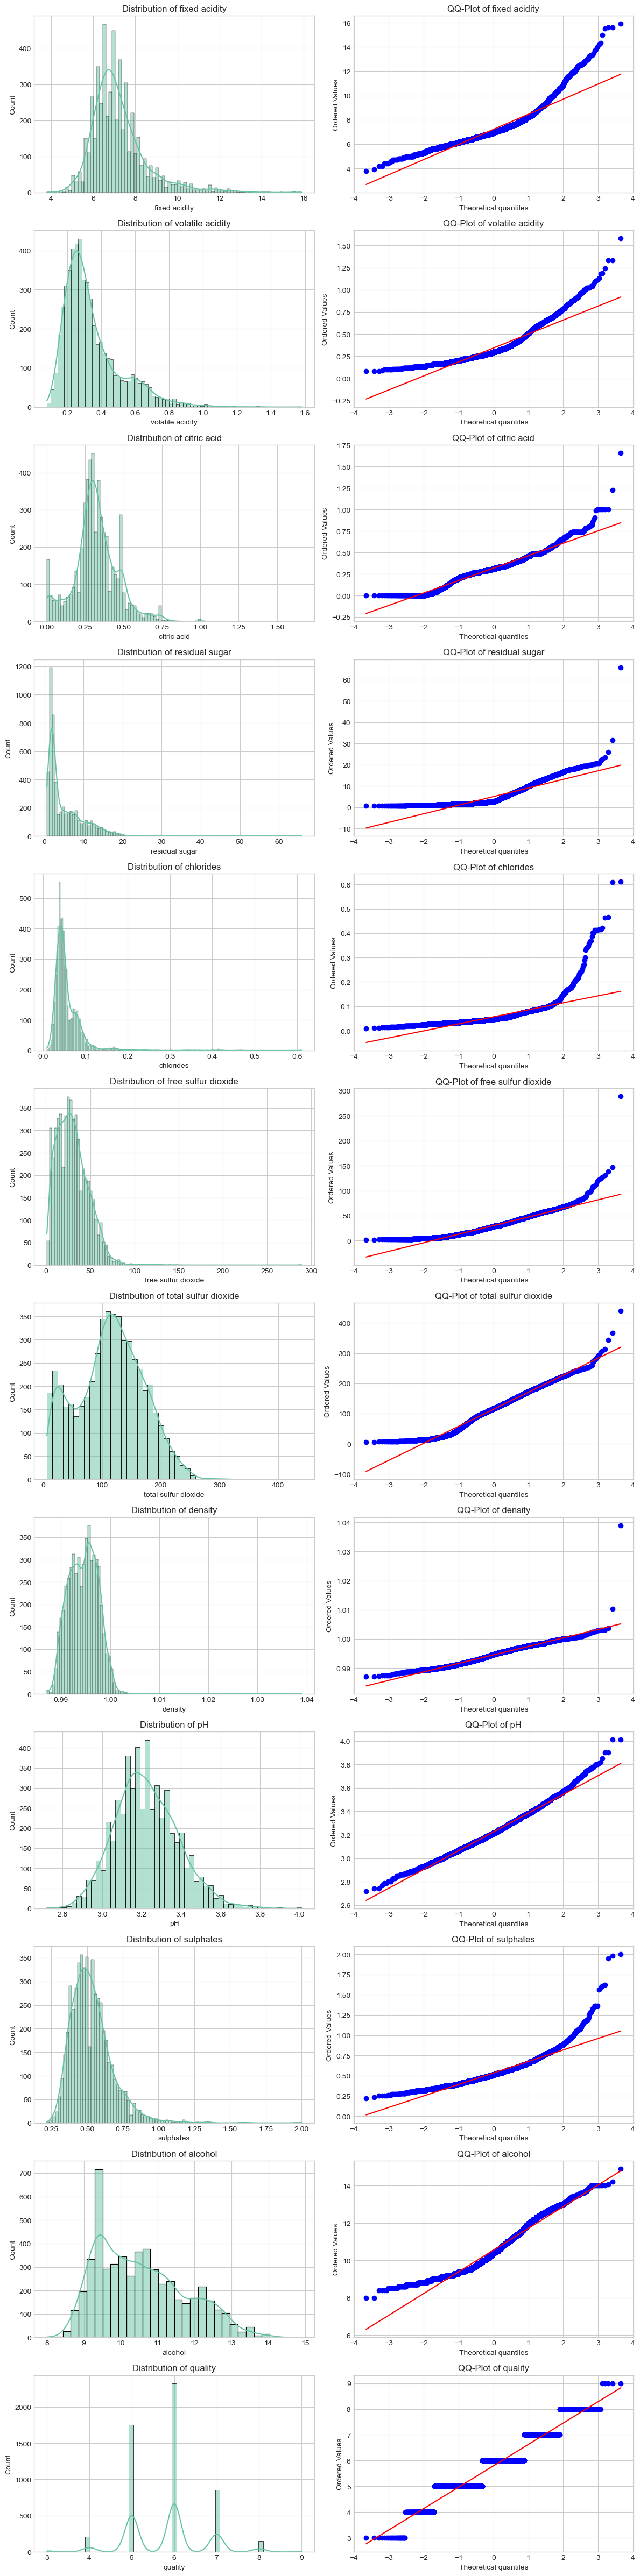

In [88]:
# Call the function
visualize_distributions(df_encoded_new)


#### Summary: Normality of Numeric Variables

Based on the statistical tests and visualizations, none of the numeric variables appear to be normally distributed (p-values are all below 0.01). 
Some features, such as `residual sugar` and `chlorides`, are highly right-skewed. Even variables that are only moderately skewed, like `alcohol`, still fail the normality tests. This is likely due to the large sample size, which makes the tests more sensitive to even small deviations from a normal distribution.
These results suggest that methods that assume normality (such as certain statistical tests or linear models) may not be appropriate without first applying data transformations.

-------------------------------

## 7: Plot diagrams that visualize the differences in red and white wine samples

To compare the distributions of all independent variables between red and white wines, we use box plots. These plots show how each feature (such as acidity, sugar, and alcohol) differs based on wine type. Each subplot displays the spread, median, and potential outliers for one variable, separated by red and white wine. By putting all the box plots together in a grid, we get a full overview of how the two types of wine differ across all features. This helps us quickly spot which variables vary the most between red and white wines.

### Box Plots

A **box plot** (also called a box-and-whisker plot) is a type of chart that helps visualize the spread and distribution of a dataset. It provides a quick summary of key statistics and is especially useful for comparing multiple groups side by side.

#### What a Box Plot Shows

- **Median** (middle value): shown as a line inside the box  
- **First quartile (Q1)**: the lower edge of the box (25% of data falls below this)  
- **Third quartile (Q3)**: the upper edge of the box (75% of data falls below this)  
- **Interquartile range (IQR)**: the height of the box, calculated as Q3 - Q1  
- **Whiskers**: lines that extend from the box to show the range of the data, excluding outliers  
- **Outliers**: individual points plotted outside the whiskers — these are values that are unusually high or low  

#### Why Use Box Plots?

- They clearly show how data is spread out and whether it is symmetrical or skewed  
- They make it easy to spot outliers  
- They are great for comparing the distribution of a variable across different groups (for example, red vs. white wine)


#### Compare Distributions
These plots show how the 11 chemical properties (our independent variables) are distributed for red and white wines. You can see the median, spread (quartiles), and outliers — making it easy to compare the two wine types side by side.

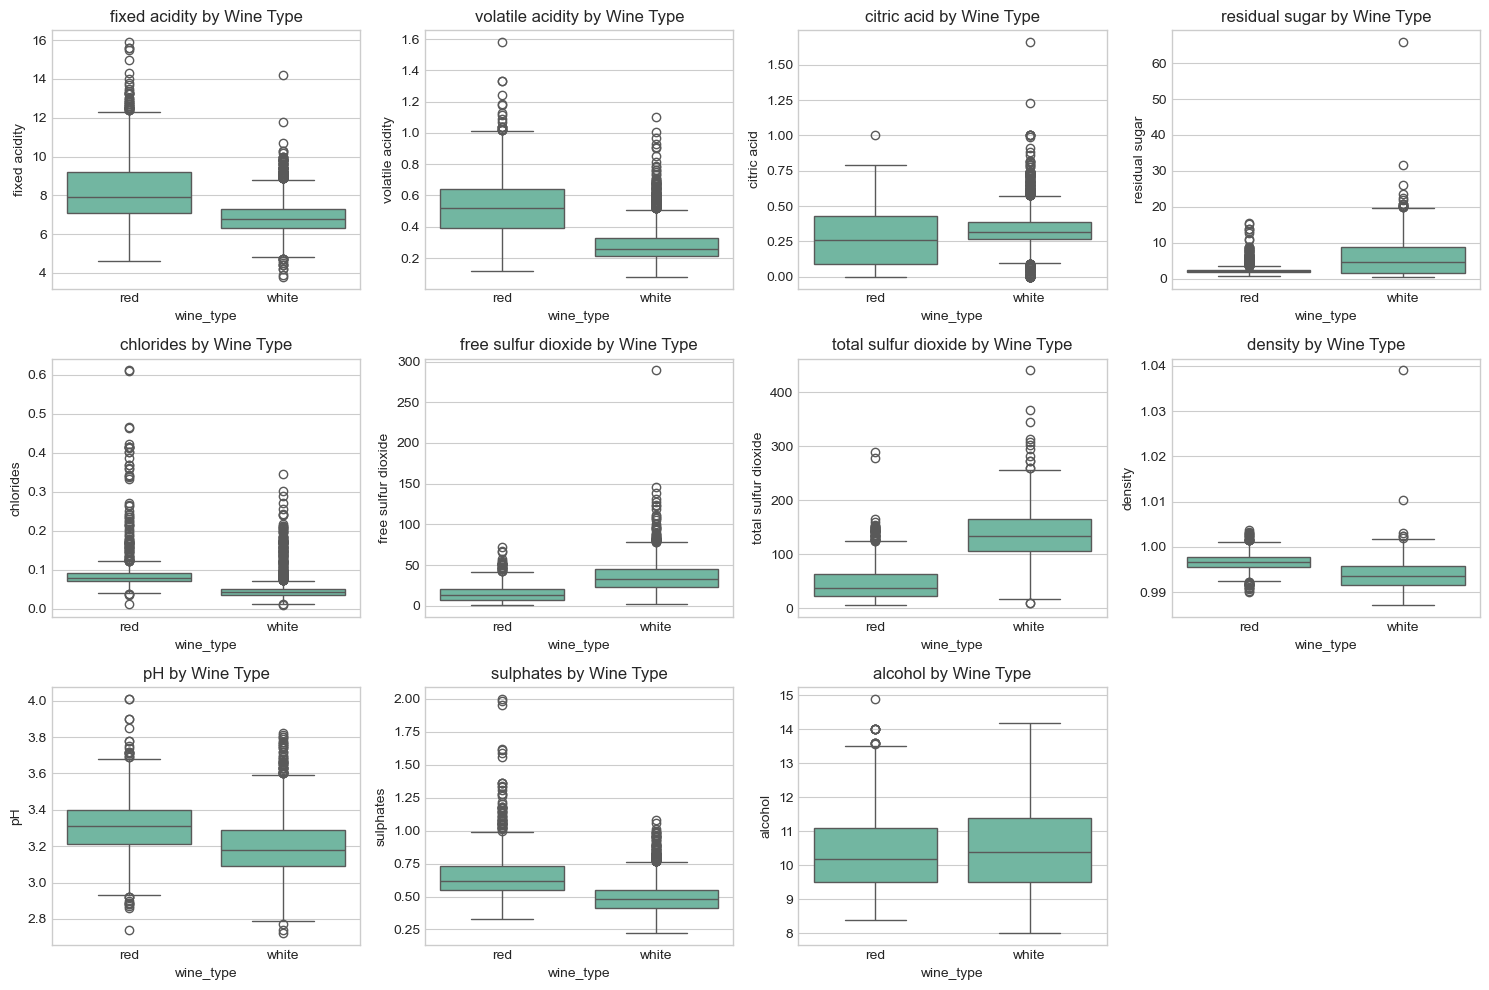

In [95]:
# Box plots to compare distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(independent_variables, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='wine_type', y=column, data=df_combined)
    plt.title(f'{column} by Wine Type')
    plt.tight_layout()
plt.show()


### Bar Plots

A **bar plot** is a common type of chart used to display and compare **average values or totals** across different categories. Each bar represents a group, and the height of the bar shows the size or value for that group.

Bar plots are great for visualizing summary statistics like means, counts, or proportions in a simple and clear way.

#### What a Bar Plot Shows

- **Categories** on the x-axis (for example, red vs. white wine)
- **Values** on the y-axis (such as average alcohol content or number of samples)
- **Bar height** reflects the value for that category  
- Optionally, bars can be grouped or colored to compare multiple series side by side

#### Why Use Bar Plots?

- They are easy to read and interpret  
- They clearly show differences between groups  
- They are ideal for visualizing comparisons of numerical values across categories  
- Great for summarizing and presenting mean values, totals, or differences (e.g., average quality by wine type)

Bar plots are especially useful when you want to communicate key differences in your data at a glance.


#### Quality By Wine Type
This bar plot compares the average quality rating between red and white wines, helping us see which one generally scores higher.

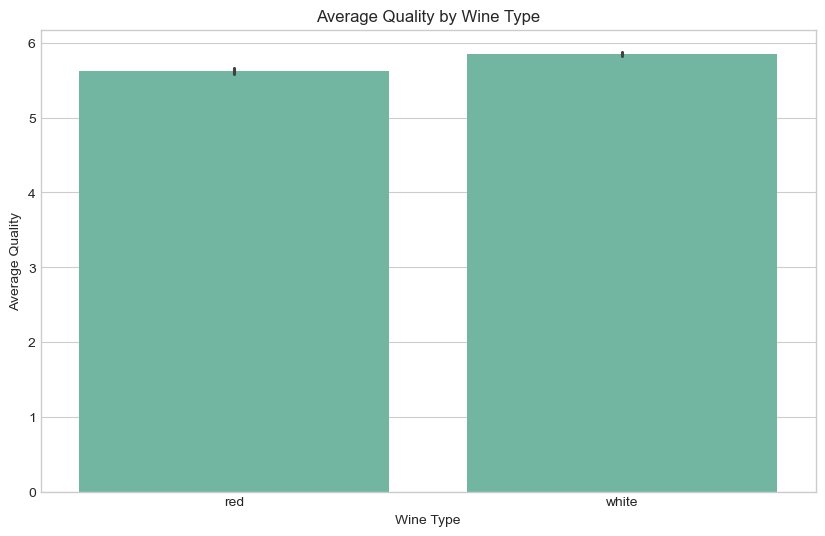


Average quality for red wine: 5.62
Average quality for white wine: 5.85
Difference in average quality: 0.23


In [98]:
# Bar plot for average quality by wine type
plt.figure(figsize=(10, 6))
sns.barplot(x='wine_type', y='quality', data=df_combined)
plt.title('Average Quality by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Average Quality')
plt.show()

# Calculate the difference in average quality
red_quality = df_combined[df_combined['wine_type'] == 'red']['quality'].mean()
white_quality = df_combined[df_combined['wine_type'] == 'white']['quality'].mean()
quality_diff = abs(red_quality - white_quality)

print(f"\nAverage quality for red wine: {red_quality:.2f}")
print(f"Average quality for white wine: {white_quality:.2f}")
print(f"Difference in average quality: {quality_diff:.2f}")

#### Summary: Wine Quality Comparison

The average quality score for red wine is 5.62, while white wine has a slightly higher average of 5.85. The difference between the two is 0.23 points. Although small, this suggests that white wines in the dataset are generally rated a bit higher in quality than red wines.

#### Alcohol Content Comparison:
To understand how alcohol content varies between red and white wines, we calculate the average alcohol percentage for each wine type and find the difference between them. This gives us a clearer picture of how the two wine types compare. In addition to the numeric values, the alcohol vs. quality plot suggests that wines with higher alcohol content tend to receive higher quality ratings, especially for white wines. This means alcohol may be one of the features that positively influences wine quality.


Average alcohol content for red wine: 10.43%
Average alcohol content for white wine: 10.59%
Difference in average alcohol content: 0.16%


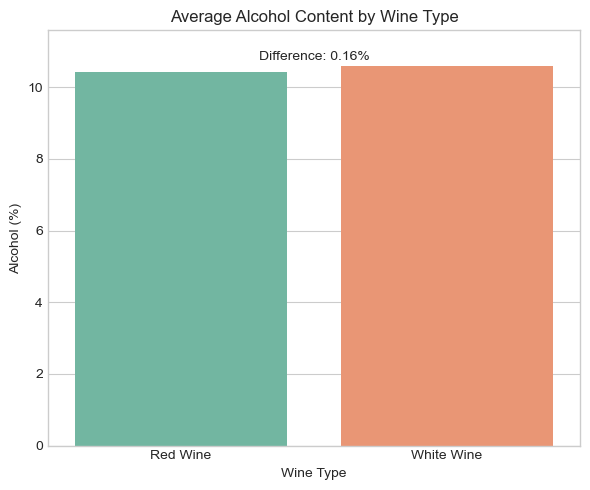

In [101]:
# Calculate the difference in average alcohol content
red_alcohol = df_combined[df_combined['wine_type'] == 'red']['alcohol'].mean()
white_alcohol = df_combined[df_combined['wine_type'] == 'white']['alcohol'].mean()
alcohol_diff = abs(red_alcohol - white_alcohol)

print(f"\nAverage alcohol content for red wine: {red_alcohol:.2f}%")
print(f"Average alcohol content for white wine: {white_alcohol:.2f}%")
print(f"Difference in average alcohol content: {alcohol_diff:.2f}%")

# Create a small DataFrame for plotting
alcohol_data = pd.DataFrame({
    'Wine Type': ['Red Wine', 'White Wine'],
    'Alcohol': [red_alcohol, white_alcohol]
})

# Bar plot with proper hue usage
plt.figure(figsize=(6, 5))
sns.barplot(data=alcohol_data, x='Wine Type', y='Alcohol', hue='Wine Type', palette='Set2', legend=False)

# Add title and labels
plt.title('Average Alcohol Content by Wine Type')
plt.ylabel('Alcohol (%)')
plt.xlabel('Wine Type')

# Annotate the difference above the bars
plt.text(0.5, max(red_alcohol, white_alcohol) + 0.1,
         f'Difference: {alcohol_diff:.2f}%',
         ha='center', va='bottom', fontsize=10)

# Adjust y-axis
plt.ylim(0, max(red_alcohol, white_alcohol) + 1)

# Layout fix
plt.tight_layout()
plt.show()

#### Summary: Alcohol Content Comparison

The average alcohol content for red wine is 10.43%, while white wine has a slightly higher average of 10.59%. The difference between the two is small — only 0.16%. Although minor, this supports the trend observed in the plots that white wines tend to have slightly more alcohol. This difference may also help explain why higher alcohol levels are often linked to higher quality scores, especially in white wines.

### Average Residual Sugar By Wine Type

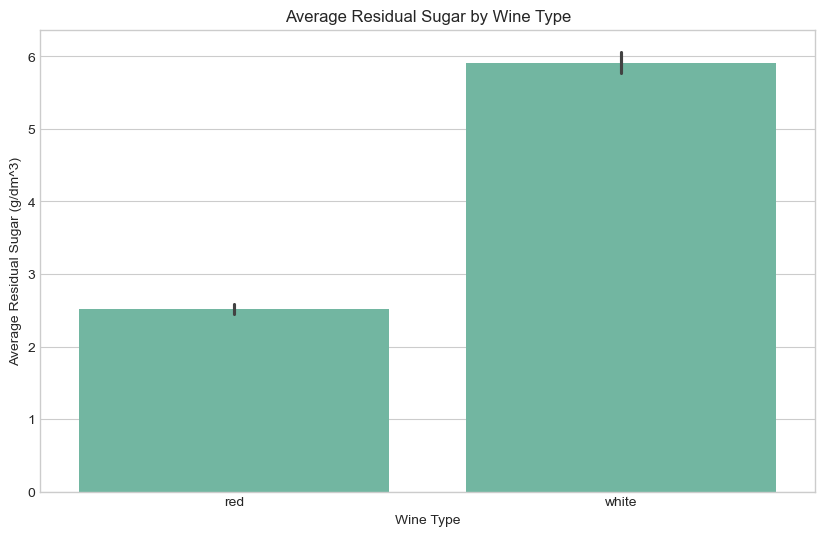

In [104]:
# Bar plot for average residual sugar by wine type
plt.figure(figsize=(10, 6))
sns.barplot(x='wine_type', y='residual sugar', data=df_combined)
plt.title('Average Residual Sugar by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Average Residual Sugar (g/dm^3)')
plt.show()

#### Summary: Residual Sugar Comparison

The bar plot shows the average residual sugar content for red and white wines. It is clear that white wines have a higher average level of residual sugar compared to red wines. This suggests that white wines tend to be sweeter or have more unfermented sugar remaining. The difference is visually noticeable and may reflect differences in production styles or grape varieties used for each type.

 ### Calculate the difference in average residual sugar

In [107]:
# Below we will find the residual sugar by using the .mean() method on the pandas df_combined dataframe
red_sugar = df_combined[df_combined['wine_type'] == 'red']['residual sugar'].mean()
white_sugar = df_combined[df_combined['wine_type'] == 'white']['residual sugar'].mean()

# We're comparing the wine type (red or white) to the average amount of residual sugar to see if one type of wine tends to have more sugar than the other.
sugar_diff = abs(red_sugar - white_sugar)

print(f"\nAverage residual sugar for red wine: {red_sugar:.2f} g/dm^3")
print(f"Average residual sugar for white wine: {white_sugar:.2f} g/dm^3")
print(f"Difference in average residual sugar: {sugar_diff:.2f} g/dm^3")


Average residual sugar for red wine: 2.52 g/dm^3
Average residual sugar for white wine: 5.91 g/dm^3
Difference in average residual sugar: 3.39 g/dm^3


#### Summary: Residual Sugar Comparison

The average residual sugar content for red wine is 2.52 g/dm³, while white wine has a significantly higher average of 5.91 g/dm³. This results in a difference of 3.39 g/dm³. The data clearly shows that white wines tend to have more residual sugar than red wines, which may contribute to their typically sweeter taste.

## Scatter Plots

A **scatter plot** is a type of graph used to show the relationship between two numeric variables. Each point on the plot represents a single observation in the dataset, placed based on its values for the two variables.

#### What a Scatter Plot Shows

- The **x-axis** shows values for one variable  
- The **y-axis** shows values for another variable  
- Each **dot** represents one data point (e.g., one wine sample)

Scatter plots help us see patterns, trends, or relationships — for example, whether one variable increases as the other increases, or if there is no clear pattern.

#### Why Use Scatter Plots?

- To see if there is a **correlation** between two variables  
- To identify **clusters**, **trends**, or **outliers**  
- To explore how one feature might influence another (e.g., does more alcohol mean higher quality?)

Scatter plots are especially helpful when we want to understand if two variables are related in a linear, curved, or random way.
Would you like to follow this with example plots from your dataset, like alcohol vs. quality or residual sugar vs. quality?

### Scatter Plots: Alcohol and Residual Sugar vs. Quality
The scatter plots above show how two key features — alcohol and residual sugar — relate to wine quality for both red and white wines.
In the **Alcohol vs. Quality** plot, we can see a general trend where wines with higher alcohol content tend to receive higher quality scores. This trend is more noticeable in white wines, suggesting that alcohol level may be a strong indicator of wine quality, especially for whites.                                                                                                                                                                                                                                                                        The **Residual Sugar vs. Quality** plot shows a different pattern. There is no clear relationship between sugar content and quality. Wines with both high and low sugar levels can have similar quality scores. This suggests that residual sugar does not strongly influence how wine quality is rated, at least in this dataset.
These scatter plots help us visually identify which features might be important when predicting or explaining wine quality.

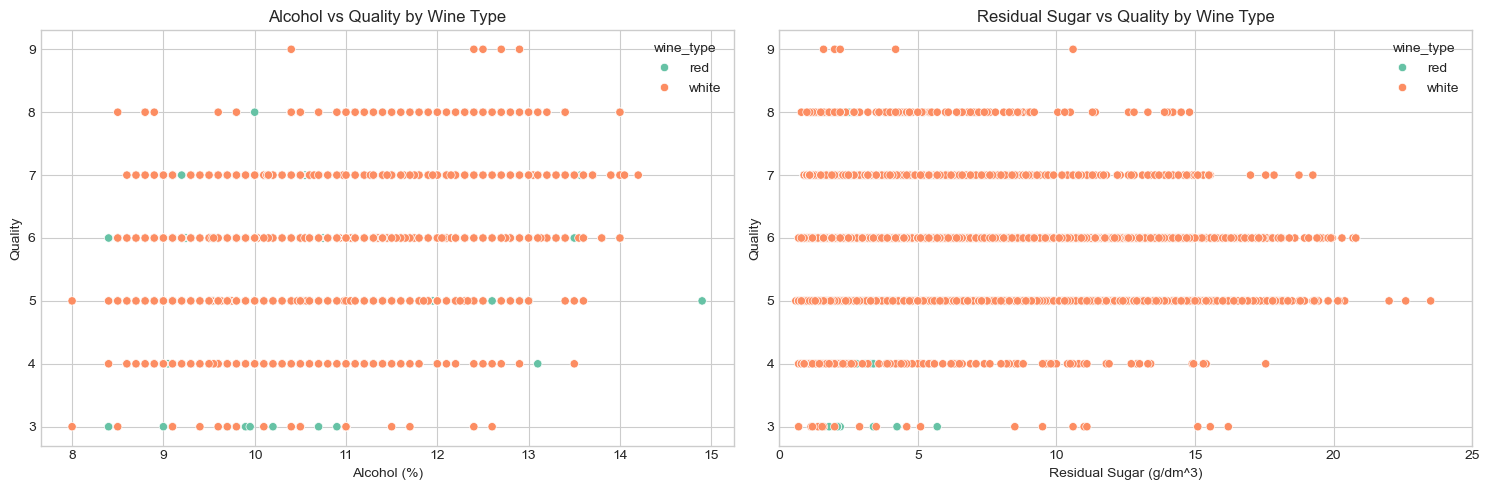

In [111]:
# Scatter plots to visualize the relationship between alcohol, residual sugar, and quality
plt.figure(figsize=(15, 5))

# Alcohol vs Quality
# This plot helps you see whether higher or lower alcohol content is linked to better wine quality, and if that trend is different for red vs white wine.
plt.subplot(1, 2, 1)
sns.scatterplot(x='alcohol', y='quality', hue='wine_type', data=df_combined)
plt.title('Alcohol vs Quality by Wine Type')
plt.xlabel('Alcohol (%)')
plt.ylabel('Quality')

# Residual Sugar vs Quality
# This one shows how residual sugar levels relate to wine quality. For example, if most high-quality wines have low sugar, you might see them clustered toward the left.
plt.subplot(1, 2, 2)
sns.scatterplot(x='residual sugar', y='quality', hue='wine_type', data=df_combined)
plt.title('Residual Sugar vs Quality by Wine Type')
plt.xlabel('Residual Sugar (g/dm^3)')
plt.ylabel('Quality')
plt.xlim(0, 25)

plt.tight_layout()
plt.show()

#### Which wine has a higher average quality?
White wine has a slightly higher average quality score — about **5.85**, compared to **5.62** for red wine.  
The difference is **0.23 points**, which is fairly small on a scale from 3 to 9.

#### Which wine has more alcohol on average?
White wine has a slightly higher average alcohol content: **10.59%** vs. **10.43%** in red wine.  
That’s a **0.16%** difference — very minor.

#### Which wine contains more residual sugar?
White wine clearly has more residual sugar on average: **5.91 g/dm³** compared to **2.52 g/dm³** in red wine.  
That’s a difference of **3.39 g/dm³**, meaning white wine has **more than twice** the sugar.

#### Summary
Alcohol content seems to be a more important factor for quality in both wine types.  
Residual sugar has little to no impact for red wine and a slight negative effect for white wine.


### Calculate correlation coefficients

In [114]:
# Calculate correlation coefficients
red_alcohol_quality_corr = df_combined[df_combined['wine_type'] == 'red'][['alcohol', 'quality']].corr().iloc[0, 1]
white_alcohol_quality_corr = df_combined[df_combined['wine_type'] == 'white'][['alcohol', 'quality']].corr().iloc[0, 1]
red_sugar_quality_corr = df_combined[df_combined['wine_type'] == 'red'][['residual sugar', 'quality']].corr().iloc[0, 1]
white_sugar_quality_corr = df_combined[df_combined['wine_type'] == 'white'][['residual sugar', 'quality']].corr().iloc[0, 1]

print(f"\nCorrelation between alcohol and quality for red wine: {red_alcohol_quality_corr:.2f}")
print(f"Correlation between alcohol and quality for white wine: {white_alcohol_quality_corr:.2f}")
print(f"Correlation between residual sugar and quality for red wine: {red_sugar_quality_corr:.2f}")
print(f"Correlation between residual sugar and quality for white wine: {white_sugar_quality_corr:.2f}")


Correlation between alcohol and quality for red wine: 0.48
Correlation between alcohol and quality for white wine: 0.46
Correlation between residual sugar and quality for red wine: 0.01
Correlation between residual sugar and quality for white wine: -0.12


#### Do alcohol and sugar levels affect wine quality?
Yes — but their impact depends on the type of wine:

- **Alcohol:**  
  - *Red wine:* Moderate positive correlation (**0.48**) — more alcohol tends to mean better quality.  
  - *White wine:* Also a moderate positive correlation (**0.46**).

- **Residual Sugar:**  
  - *Red wine:* Almost no correlation (**0.01**) — sugar doesn’t really affect quality.  
  - *White wine:* Weak negative correlation (**-0.12**) — wines with less sugar may score slightly higher.

--------------------------

------------------------------

### 8: Discuss which other questions might be of interest for the wine consumers and which of wine distributers.

#### For Wine Consumers
Wine Consumers Might Be Interested In:
What features besides alcohol and sugar leads to higher-quality wine?
→ Exploring the data for acidity (fixed acidity, volatile acidity, citric acid)

Is there a big difference in quality between red and white wines?
→ Supports personal preference and decision-making.

Does higher alcohol content mean better taste or quality?
→ Many consumers associate strength with taste or premium feel.

Is low sugar always better in terms of wine quality?
→ Useful for health-conscious buyers.

Which wines have fewer chemicals (e.g., sulfur dioxide or chlorides)?
→ Important for people with sensitivities or who want "natural" wine.

#### For Wine Distributors
Wine Distributors Might Be Interested In:
Which features most strongly predict wine quality?
→ Helps select which wines to buy and promote.

Is there a noticeable difference in consumer preference between red and white wines?
→ Supports inventory and marketing decisions.

What chemical properties (e.g., acidity, sulphates) correlate with higher-rated wines?
→ Useful for sourcing or recommending wines to sellers.


### 9: Split the aggregated data into five subsets by binning the attribute pH.

In [121]:
print("Min pH:", df_combined['pH'].min())
print("Max pH:", df_combined['pH'].max())
df_combined['pH'].unique()

Min pH: 2.72
Max pH: 4.01


array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 , 2.96, 2.97, 3.64, 2.85, 3.82, 3.81, 3.65, 3.77, 2.91, 2.8 ,
       2.72, 2.79, 3.8 , 2.77, 3.79, 2.84, 3.76, 2.83, 2.82])

In [122]:
# Define 5 equal-width intervals based on min and max pH
bins = [2.72, 2.98, 3.24, 3.50, 3.76, 4.01]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Divide pH values into these fixed-width bins
df_combined['pH_bin_cut'] = pd.cut(
    df_combined['pH'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Check distribution in each bin
print(df_combined['pH_bin_cut'].value_counts())

pH_bin_cut
Low          2789
Medium       1975
Very Low      292
High          250
Very High      14
Name: count, dtype: int64


#### Which subset has highest density?
The above result shows that Low has the highest density, which has a pH value of range 2.98 to 3.24. 



#### What if you split the data in ten subsets?

In [125]:
# Define 10 equal-width intervals based on min and max pH
bins = [2.72, 2.849, 2.978, 3.107, 3.236, 3.365, 3.494, 3.623, 3.752, 3.881, 4.01]
labels = ['Extremely Low', 'Very Low', 'Low', 'Moderately Low', 'Slightly Low', 'Slightly High', 'Moderately High', 'High', 'Very High', 'Extremely High']


# Divide pH values into these fixed-width bins
df_combined['pH_bin_cut'] = pd.cut(
    df_combined['pH'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Check distribution in each bin
print(df_combined['pH_bin_cut'].value_counts())

pH_bin_cut
Moderately Low     1718
Slightly Low       1403
Low                 969
Slightly High       686
Very Low            239
Moderately High     228
High                 47
Extremely Low        14
Very High            12
Extremely High        4
Name: count, dtype: int64


#### Which subset has highest density? 
The above result shows that Moderately Low has the highest density, which has a pH value of range 3.107 to 3.236. 

### 10: Create a correlation matrix and a heat map of all data and investigate it

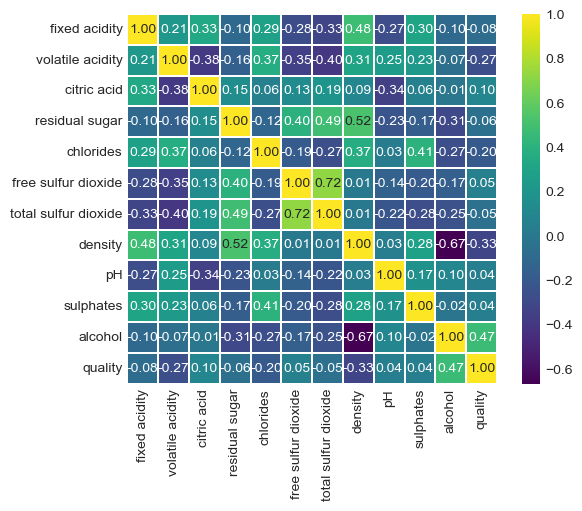

In [128]:
# function creates a correlation matrix from our DataFrame. 
def my_corr(df_encoded_new):
    cormat = df_encoded_new.drop(columns='wine_type').corr() #checks how strongly each pair of columns are related and drops column 'wine-type'. 
    return cormat

# function that takes the correlation matrix and draws a heatmap (using Seaborn)
def my_corr_plot(cormat):
    sns.heatmap(cormat, cmap = 'viridis',  annot=True, fmt=".2f", square=True, linewidths=.2) #cmap - sets the color style. annot=true - means the numbers will be shown on the heatmap. 
    plt.show()


my_corr_plot(my_corr(df_encoded_new))

Above correlation matrix shows how strong the different features correlate. 
The closere it gets to 1, the strongere is the postive correlation.
The closere it gets to -1, the strongere is the negative correlation. 
The closere it gets to 0, the weaker is the correlation or non existing. 

#### Tell which wine attribute has the biggest influence on the wine quality. 

alcohol has a correlation of 0.47 to quality, which is the higest postive correlation of quality. 


#### Which has the lowest? 

pH and sulphates has a correlation of 0.04 to quality, which is the lowest correlation of quality. 

#### Are there any attributes, apart from the wine quality, which are highly correlated? 

alcohol and density has a correlation of -0.67, whish is a strong negative correlation.

total sulfur dioxide and free sulfur dioxide has a strong positive correlation of 0.72. 

density and residual sugar also has a strong positive correlation of 0.52. 


# Prepare the Data for Further Analysis 

### 11: Explore the feature ‘residual sugar’. 

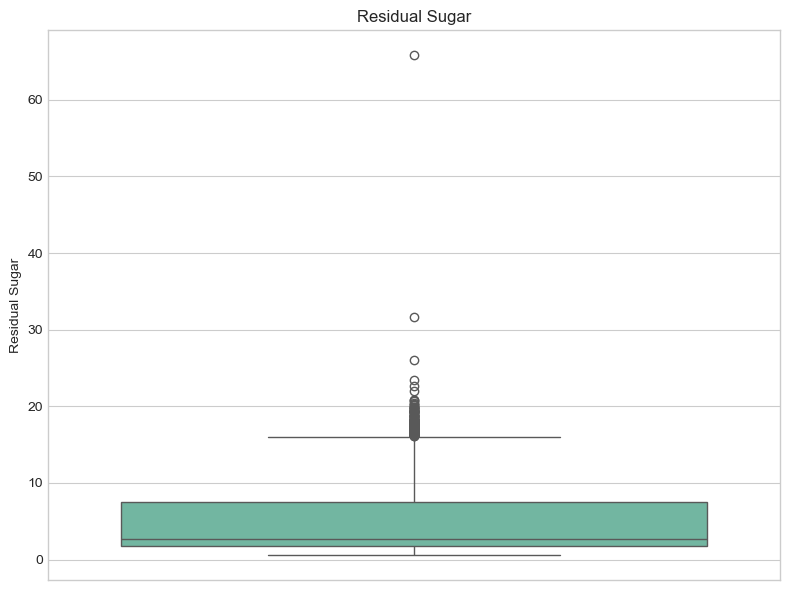

In [138]:
# Create the boxplot to visualize the overall distribution of residual sugar in our combined dataset
plt.figure(figsize=(8, 6))
sns.boxplot(y='residual sugar', data=df_combined)
plt.title('Residual Sugar')
plt.ylabel('Residual Sugar')
plt.tight_layout()
plt.show()

The boxplot shows that the residual sugar distribution has several outliers. The majority of the data seems to be concentrated in the lower range, but there are multiple data points that lie above the typical range.

#### Comparing Residual Sugar Between Wine Types

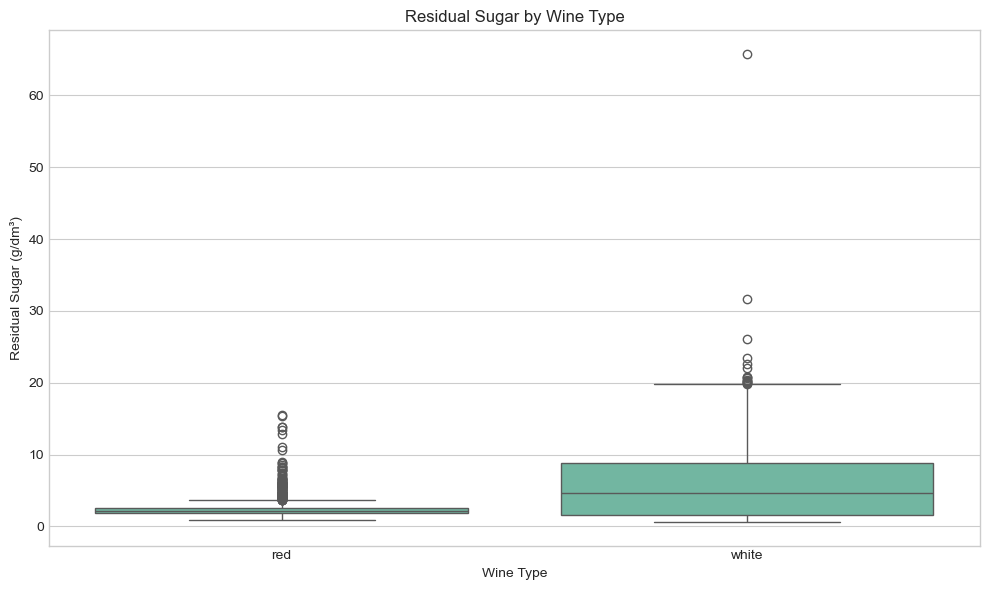

In [141]:
# Create a boxplot comparing residual sugar between wine types
plt.figure(figsize=(10, 6))
sns.boxplot(x='wine_type', y='residual sugar', data=df_combined)
plt.title('Residual Sugar by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Residual Sugar (g/dm³)')
plt.tight_layout()
plt.show()

This visualization highlights a clear difference in residual sugar levels between red and white wines. White wines generally have a higher median residual sugar content, as well as a wider range of values compared to red wines. Additionally, the presence of more extreme outliers in white wines suggests that some white varieties may be significantly sweeter

#### Does it contain outliers? On which rows of the data frame are they found? Remove those rows. 


In [144]:
# Function to identify outliers using IQR method
def my_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3 - q1
    # Values smaller than 1.5 IQR below q1 and bigger that 1.5 IQR over q3
    outliers = data[(data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR))]
    return outliers

outliers = my_outliers(df_combined['residual sugar'])
print(outliers)

print(f"Number of outliers in residual sugar: {len(outliers)}")
print(f"Percentage of dataset: {(len(outliers)/len(df_combined))*100:.2f}%")

1359    20.70
1369    19.25
1392    17.95
1447    18.90
1449    16.50
        ...  
4977    16.30
5143    19.25
5189    18.35
5190    18.40
5213    19.40
Name: residual sugar, Length: 141, dtype: float64
Number of outliers in residual sugar: 141
Percentage of dataset: 2.65%


The above result shows there are 141 rows which are outliers. This represents about 2.65% of our dataset. These are primarily white wines with exceptionally high sugar content

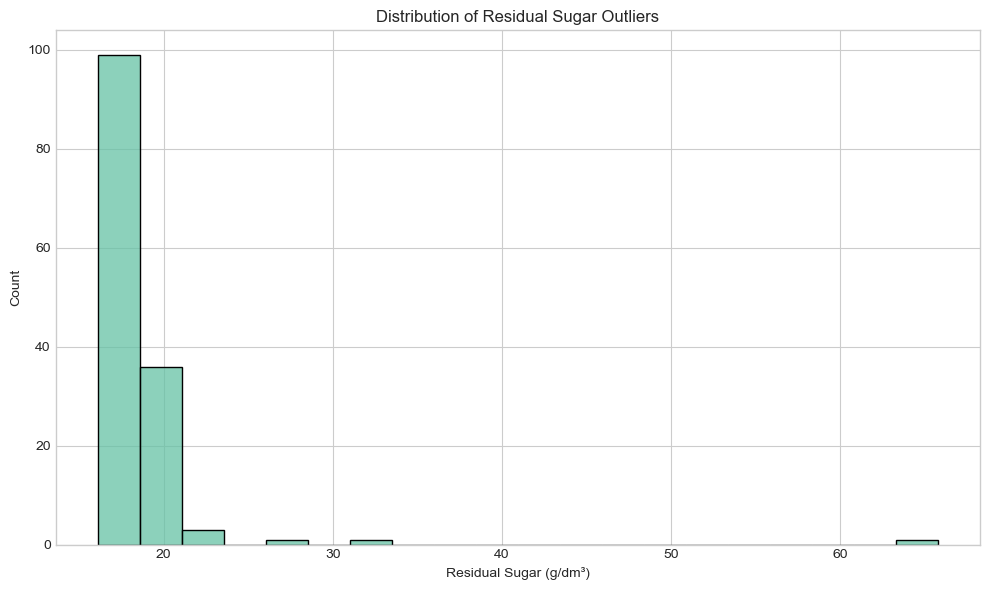

In [146]:
# Histogram of outlier values
plt.figure(figsize=(10, 6))
sns.histplot(outliers, bins=20)
plt.title('Distribution of Residual Sugar Outliers')
plt.xlabel('Residual Sugar (g/dm³)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The histogram of outliers shows that most outliers have residual sugar values between 15 and 25 g/dm³, with a few extreme cases having values above 60 g/dm³.

In [148]:
# Remove the rows with outliers
df_combined_cleaned = df_combined.drop(outliers.index)

# Check the shape of the cleaned dataset
print(f"Original dataset shape: {df_combined.shape}")
print(f"Cleaned dataset shape: {df_combined_cleaned.shape}")
print(f"Removed {df_combined.shape[0] - df_combined_cleaned.shape[0]} rows")

Original dataset shape: (5320, 14)
Cleaned dataset shape: (5179, 14)
Removed 141 rows


We have removed all 141 outliers from our dataset

#### Comparing the Distributions Before and After Outlier Removal

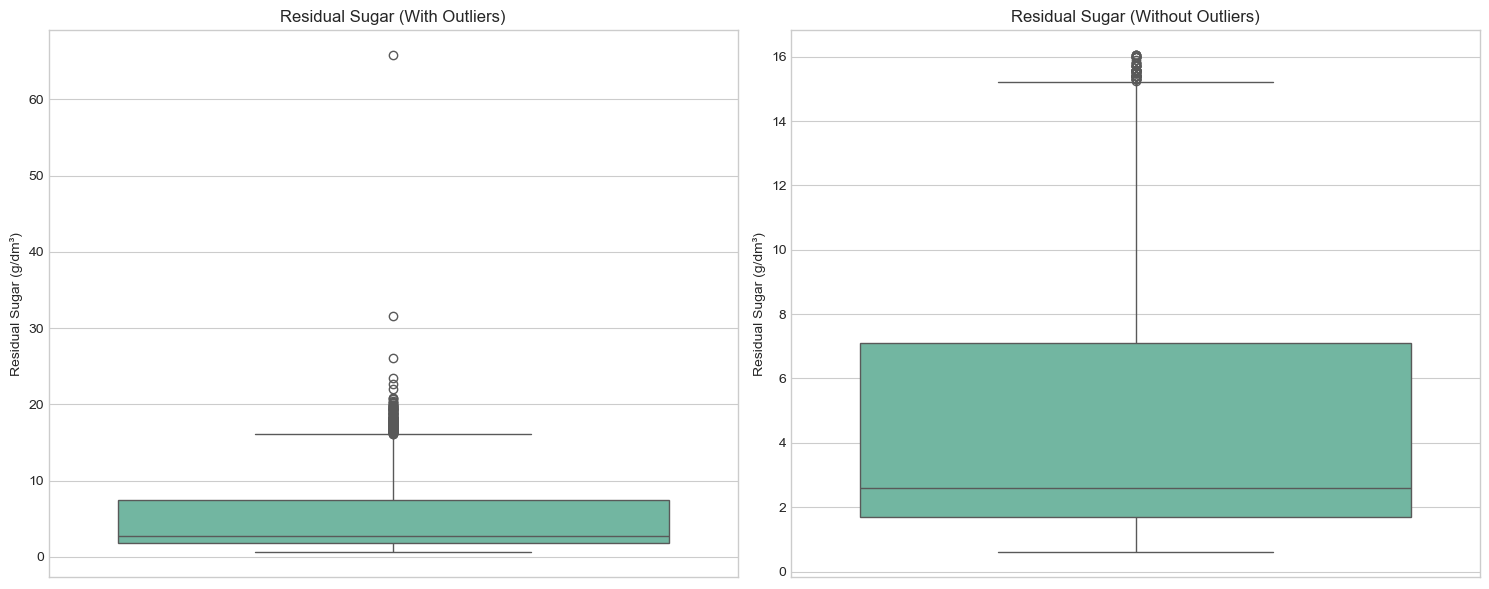

In [151]:
# Boxplot comparison before and after removing outliers
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Before cleaning
sns.boxplot(y='residual sugar', data=df_combined, ax=axes[0])
axes[0].set_title('Residual Sugar (With Outliers)')
axes[0].set_ylabel('Residual Sugar (g/dm³)')

# After cleaning
sns.boxplot(y='residual sugar', data=df_combined_cleaned, ax=axes[1])
axes[1].set_title('Residual Sugar (Without Outliers)')
axes[1].set_ylabel('Residual Sugar (g/dm³)')

plt.tight_layout()
plt.show()

The boxplots demonstrate that removing outliers results in a more precise and easier-to-read visualization of the residual sugar distribution. In the original plot, extreme values—especially in the white wines—stretch the scale and make it harder to see the differences in the typical sugar content between red and white wines. After removing these outliers, the boxplots provide a clearer view of where most values are concentrated and how much they vary within each wine type

### 12. Remove the attributes, which aren’t correlated with the wine quality, as well as the attributes that are highly correlated with another independent attribute.

In [230]:
columns_to_remove = [
    'pH',   
    'sulphates', 
    'density', 
    'free sulfur dioxide', 
    'wine_type',
    'pH_bin_cut'
]

df_final = df_combined_cleaned.drop(columns=columns_to_remove)


In [302]:
print(f"Original dataset shape: {df_combined_cleaned.shape}")
print(f"Cleaned dataset shape: {df_final.shape}")
print(f"Removed {df_combined_cleaned.shape[1] - df_final.shape[1]} columns")
df_final.head()

Original dataset shape: (5179, 14)
Cleaned dataset shape: (5179, 8)
Removed 6 columns


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,34.0,9.4,5
1,7.8,0.88,0.00,2.6,0.098,67.0,9.8,5
2,7.8,0.76,0.04,2.3,0.092,54.0,9.8,5
3,11.2,0.28,0.56,1.9,0.075,60.0,9.8,6
4,7.4,0.66,0.00,1.8,0.075,40.0,9.4,5


We have removed a total of 6 columns from our dataset.

We removed the following columns from our dataset: pH, sulphates, density, and free sulfur dioxide. These attributes were excluded either due to their low correlation with wine quality or because they were highly correlated with other independent variables. Additionally, we removed wine_type and ph_bin_cut since they are categorical text features that do not serve a meaningful purpose in the final cleaned dataset.

## 13. Transform the data by applying PCA (Principle Component Analysis).

### Data Scaling

It scales the data so that all features have a mean of 0 and a standard deviation of 1, making it ready for machine learning.
Without standardization, PCA will assume that alcohol is much more important, even if that's not actually the case.

In [255]:
sc = StandardScaler()  
X = sc.fit_transform(df_final) 
X

array([[ 0.13520968,  2.09185621, -2.1701798 , ..., -1.39399391,
        -1.00071483, -0.90862014],
       [ 0.43573045,  3.15482544, -2.1701798 , ..., -0.80800463,
        -0.66150575, -0.90862014],
       [ 0.43573045,  2.44617929, -1.89599554, ..., -1.03884889,
        -0.66150575, -0.90862014],
       ...,
       [-0.54096204, -0.6246207 , -0.86780457, ..., -0.02668559,
        -1.00071483,  0.22202467],
       [-1.29226396, -0.32935147, -0.11379785, ..., -0.04444284,
         1.88256239,  1.35266949],
       [-0.916613  , -0.80178224,  0.43457067, ..., -0.25752985,
         1.03453968,  0.22202467]])

This array represents the standardized wine dataset, where each row is a wine sample and each column is a wine feature (like alcohol, citric acid, etc.). The values have been scaled so that each feature has a mean of 0 and standard deviation of 1. This makes all features equally weighted for machine learning models, regardless of their original units or ranges. 



This scales all the features in your wine dataset to be between 0 and 1, so they’re on the same range and easier for machine learning models to work with.

In [261]:
sc = MinMaxScaler()
X = sc.fit_transform(df_final)  
X

array([[0.29752066, 0.41333333, 0.        , ..., 0.06451613, 0.20289855,
        0.33333333],
       [0.33057851, 0.53333333, 0.        , ..., 0.140553  , 0.26086957,
        0.33333333],
       [0.33057851, 0.45333333, 0.02409639, ..., 0.11059908, 0.26086957,
        0.33333333],
       ...,
       [0.2231405 , 0.10666667, 0.11445783, ..., 0.24193548, 0.20289855,
        0.5       ],
       [0.14049587, 0.14      , 0.18072289, ..., 0.23963134, 0.69565217,
        0.66666667],
       [0.18181818, 0.08666667, 0.22891566, ..., 0.21198157, 0.55072464,
        0.5       ]])

This array shows the wine dataset after applying MinMax scaling, where each feature (e.g., alcohol, citric acid) has been rescaled to a range between 0 and 1. Each row is a wine sample, and each value represents how that feature compares relative to the minimum and maximum values in the dataset. This scaling is useful when you want to preserve the shape of the original distribution but bring all features to the same scale.

### PCA and feature selection

It applies PCA (Principal Component Analysis) to reduce the complexity of your data by turning it into a set of new features (called principal components) that capture the most important patterns or variance in the original data.

In [267]:
pca = PCA()
pca_data = pca.fit_transform(X) #Run PCA on X and create new data with fewer columns
pca_data


array([[-0.18734829, -0.33255345, -0.13603652, ..., -0.00507013,
        -0.04595426, -0.01125658],
       [-0.15501817, -0.3182971 , -0.20092546, ...,  0.13444707,
        -0.02368139,  0.00554979],
       [-0.17245651, -0.30118965, -0.16793094, ...,  0.06697584,
        -0.0285836 ,  0.00750023],
       ...,
       [-0.1499366 , -0.11537095,  0.18004825, ..., -0.05465897,
        -0.05196412, -0.00607291],
       [-0.30664832,  0.33374077,  0.07246304, ...,  0.01548705,
         0.03086388, -0.02165139],
       [-0.27177911,  0.13820916,  0.12281186, ..., -0.06173816,
         0.02648043, -0.04048616]])

This output is the result of applying PCA to your wine dataset. Each row is a wine sample, and each column is a principal component, a new feature that combines the original ones to capture the most important patterns in the data. The first few columns explain most of the variation, making the data simpler and more compact for analysis or modeling.

In [269]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.43918469, 0.22235837, 0.10915456, 0.08789986, 0.06616472,
       0.03895471, 0.02270196, 0.01358114])

C:\Users\KStol\AppData\Local\Temp\ipykernel_43120\1406135175.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(explained_variance, 'bx-', c='red')


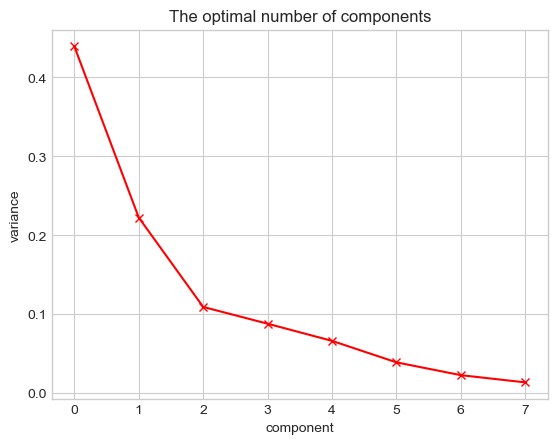

In [271]:
plt.plot(explained_variance, 'bx-', c='red')
plt.xlabel('component')
plt.ylabel('variance')
plt.title('The optimal number of components')
plt.show()

This graph shows that the first 2–3 principal components capture most of the variance in the data. After that, each additional component adds very little, so using just a few components is likely enough for good results.

C:\Users\KStol\AppData\Local\Temp\ipykernel_43120\1129877854.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b*-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(cumulative, 'b*-', c='green')


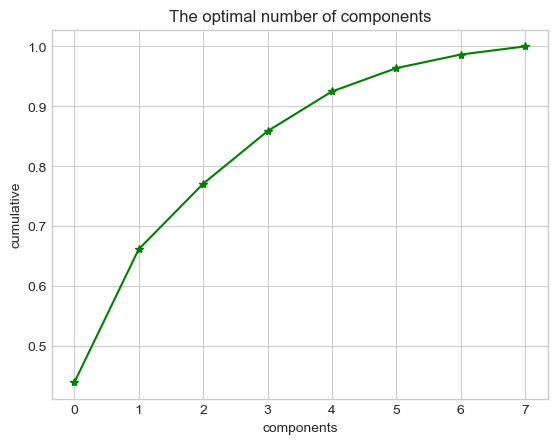

In [274]:
cumulative = np.cumsum(explained_variance)
plt.plot(cumulative, 'b*-', c='green')
plt.xlabel('components')
plt.ylabel('cumulative')
plt.title('The optimal number of components')
plt.show()

This graph shows the cumulative variance explained by the principal components. It suggests that the first 4 components capture about 90% of the total variance, meaning you can reduce your dataset to 4 dimensions with minimal information loss.

In [286]:
pca = PCA(n_components=5)
pca_data = pca.fit_transform(X)
pca_data

array([[-0.18734829, -0.33255345, -0.13603652, -0.12741134,  0.15171492],
       [-0.15501817, -0.3182971 , -0.20092546, -0.17010725,  0.12940398],
       [-0.17245651, -0.30118965, -0.16793094, -0.13064077,  0.10635961],
       ...,
       [-0.1499366 , -0.11537095,  0.18004825,  0.03482503,  0.14495528],
       [-0.30664832,  0.33374077,  0.07246304, -0.0975557 ,  0.01620444],
       [-0.27177911,  0.13820916,  0.12281186, -0.04729283, -0.06100532]])

The array shows our original data compressed into 5 new columns (components). Each row is still a data point, but now described with fewer, more meaningful numbers.

In [288]:
pcadf = pd.DataFrame(data = pca_data, columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5'])
pcadf


,pc 1,pc 2,pc 3,pc 4,pc 5
0,-0.187348,-0.332553,-0.136037,-0.127411,0.151715
1,-0.155018,-0.318297,-0.200925,-0.170107,0.129404
2,-0.172457,-0.301190,-0.167931,-0.130641,0.106360
3,-0.176649,-0.139366,-0.081305,0.358124,-0.070243
4,-0.186594,-0.325346,-0.111655,-0.119529,0.144070
...,...,...,...,...,...
5174,-0.208546,0.077020,0.102998,-0.033414,0.000558
5175,0.288971,-0.106632,0.073526,-0.042649,-0.040367
5176,-0.149937,-0.115371,0.180048,0.034825,0.144955
5177,-0.306648,0.333741,0.072463,-0.097556,0.016204


### 14. Print out ten random rows from the final dataset as a prove of concept.

In [293]:
df_final.sample(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,alcohol,quality
101,8.4,0.62,0.09,2.2,0.084,108.0,9.8,5
677,9.0,0.82,0.05,2.4,0.081,96.0,10.0,5
3767,7.4,0.28,0.40,11.9,0.032,92.0,10.8,4
2699,7.9,0.14,0.74,1.2,0.028,165.0,12.3,6
1277,6.8,0.81,0.05,2.0,0.070,14.0,10.8,6
5033,8.6,0.36,0.26,11.1,0.030,171.0,12.0,5
751,9.1,0.21,0.37,1.6,0.067,10.0,11.1,7
5267,5.7,0.22,0.25,1.1,0.050,175.0,11.1,6
262,11.1,0.18,0.48,1.5,0.068,15.0,10.1,6
2144,6.1,0.27,0.44,6.7,0.041,230.0,8.9,5
